In [15]:
import sys
!{sys.executable} -m pip install -U google-cloud-bigquery[bqstorage,pandas]

Requirement already up-to-date: google-cloud-bigquery[bqstorage,pandas] in /opt/conda/lib/python3.7/site-packages (1.28.0)


### Import that Pandas package.  We will use to hold the results of the queries, print Pandas tables, and print simple data visualizations.

In [16]:
import pandas as pd


### In the next cell, we run a bq using the bang to shell out to linux

In [17]:
! bq query --use_legacy_sql=FALSE 'SELECT start_station_name, end_station_name, count(*) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5'

Waiting on bqjob_r523c412b3afc3db4_00000174cd894642_1 ... (0s) Current status: DONE   
+-----------------------------------------+--------------------------------------+-----------+
|           start_station_name            |           end_station_name           | trip_freq |
+-----------------------------------------+--------------------------------------+-----------+
| Harry Bridges Plaza (Ferry Building)    | Embarcadero at Sansome               |      9150 |
| San Francisco Caltrain 2 (330 Townsend) | Townsend at 7th                      |      8508 |
| 2nd at Townsend                         | Harry Bridges Plaza (Ferry Building) |      7620 |
| Harry Bridges Plaza (Ferry Building)    | 2nd at Townsend                      |      6888 |
| Embarcadero at Sansome                  | Steuart at Market                    |      6874 |
+-----------------------------------------+--------------------------------------+-----------+


### In the next cell, we add the command line options:

--format=csv which formats it into comma separated value

\> result.csv which writes the output to a file

this allows us to read the file back into pandas

If you have more than 100 rows, you may want to use the max_rows parameter like this:

--max_rows=1000000

In [18]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, count(*) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5' > result.csv

Waiting on bqjob_r16b7ef4246fce995_00000174cd894db5_1 ... (0s) Current status: DONE   


### Read the data from the file into Pandas and create a simple data visualization

In [19]:
pop_trips = pd.read_csv('result.csv')

In [20]:
pop_trips

,start_station_name,end_station_name,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874


<AxesSubplot:>

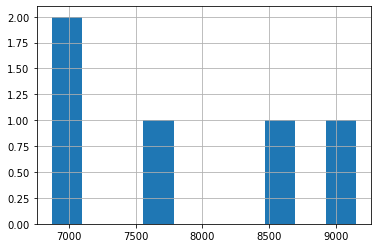

In [21]:
pop_trips.trip_freq.hist()

### We can also use the magic commands to run  BigQuery SQL


#### This runs the query above and prints to the notebook output

In [22]:
%%bigquery

SELECT start_station_name, end_station_name, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY start_station_name, end_station_name 
ORDER BY trip_freq DESC LIMIT 5

AttributeError: 'ClientOptions' object has no attribute 'credentials_file'

#### This next magic command saves it into a Pandas data frame

In [23]:
%%bigquery my_panda_data_frame

SELECT start_station_name, end_station_name, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY start_station_name, end_station_name 
ORDER BY trip_freq DESC LIMIT 5

AttributeError: 'ClientOptions' object has no attribute 'credentials_file'

In [24]:
my_panda_data_frame

NameError: name 'my_panda_data_frame' is not defined

In [ ]:
my_panda_data_frame.trip_freq.hist()